In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#reading the csv file
df=pd.read_csv('world_population.csv')

In [3]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df.shape

(234, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [6]:
#finding any duplicate data
df.duplicated().sum()

0

In [7]:
df.corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


In [8]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

*** Data contains no missing value.***

## **Data Visualizations**

Text(0, 0.5, 'No. of Countries')

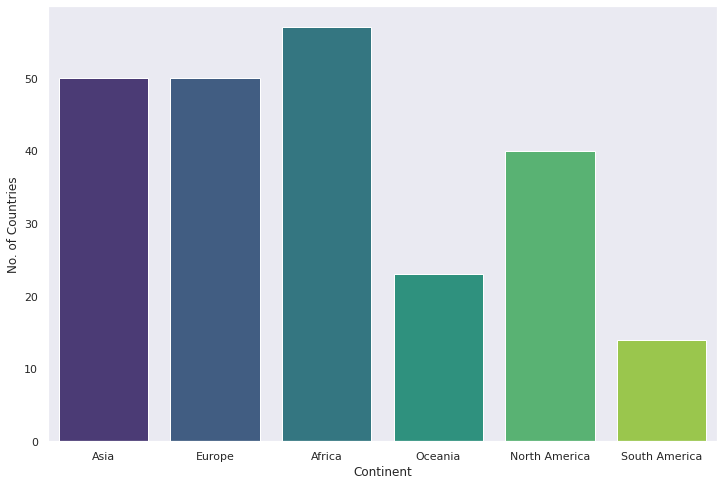

In [9]:
plt.figure(figsize=(12,8))
sns.set_style("dark")
sns.set_context("notebook")
sns.countplot(x = 'Continent', data = df, palette= 'viridis')
plt.xlabel('Continent')
plt.ylabel('No. of Countries')

***Africa has more number of countries followed by Asia and Europe,then North America,Oceania and South America.***

In [10]:
pop22=df.sort_values('2022 Population',ascending=False)[:10]
#Sorts the views column in Descending order,the top 5 fields are taken stored in most_viewed variable
pop22[['Country','2022 Population']]
# As we can see that the video "Nick Andopolis: Drummer" has the most views on youtube

,Country,2022 Population
41,China,1425887337
92,India,1417173173
221,United States,338289857
93,Indonesia,275501339
156,Pakistan,235824862
149,Nigeria,218541212
27,Brazil,215313498
16,Bangladesh,171186372
171,Russia,144713314
131,Mexico,127504125


Text(0.5, 1.0, 'Most populous country by 2022')

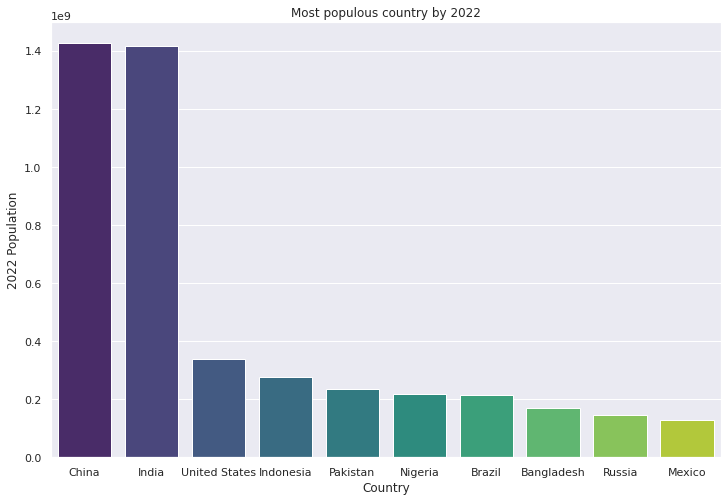

In [11]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid") #setting the style
sns.set_context("notebook")
sns.barplot(x='Country',y="2022 Population",data=pop22,palette="viridis")  # using seaborn Library 

plt.title("Most populous country by 2022")

***With the 2022 population survey, china and india are the most populous country***

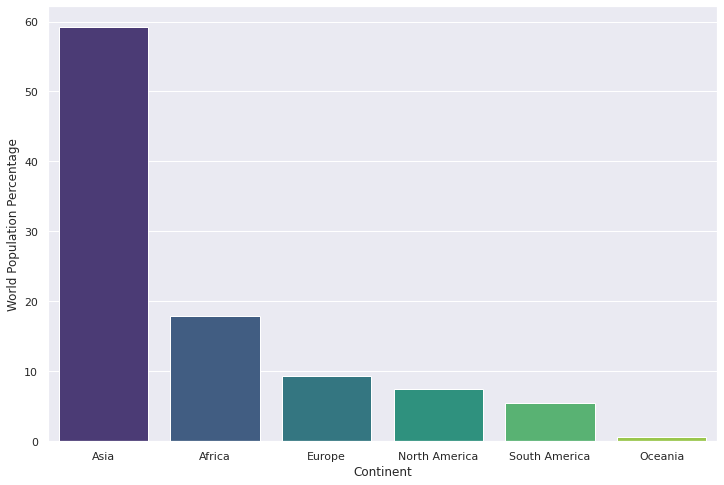

In [12]:
plt.figure(figsize=(12,8))
cont_data_percentage = df.groupby('Continent')['World Population Percentage'].sum().round(1).sort_values(ascending= False).reset_index()
cont_data_percentage
sns.barplot(x='Continent',y="World Population Percentage",data=cont_data_percentage,palette="viridis")  # using seaborn Library 

***Asia has the largest population percentage than anyother continent in the world***

In [13]:
ppl_diff_70to22 = df.groupby('Continent')[['1970 Population','2022 Population']].sum().sort_values(by = 'Continent', ascending= True).reset_index()

ppl_diff_70to22['Percentage'] = round(ppl_diff_70to22['1970 Population']/ ppl_diff_70to22['2022 Population']*100,2)
ppl_diff_70to22

,Continent,1970 Population,2022 Population,Percentage
0,Africa,365444348,1426730932,25.61
1,Asia,2144906290,4721383274,45.43
2,Europe,655923991,743147538,88.26
3,North America,315434606,600296136,52.55
4,Oceania,19480270,45038554,43.25
5,South America,192947156,436816608,44.17


In [14]:
percent_wp = df.groupby('Continent')['World Population Percentage'].sum().to_frame().sort_values(by='World Population Percentage', ascending=False)

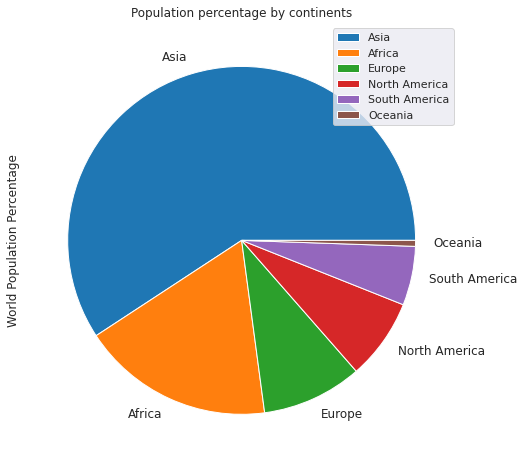

In [15]:
percent_wp.plot(kind='pie', y='World Population Percentage', title='Population percentage by continents', fontsize=12, figsize=(12,8))

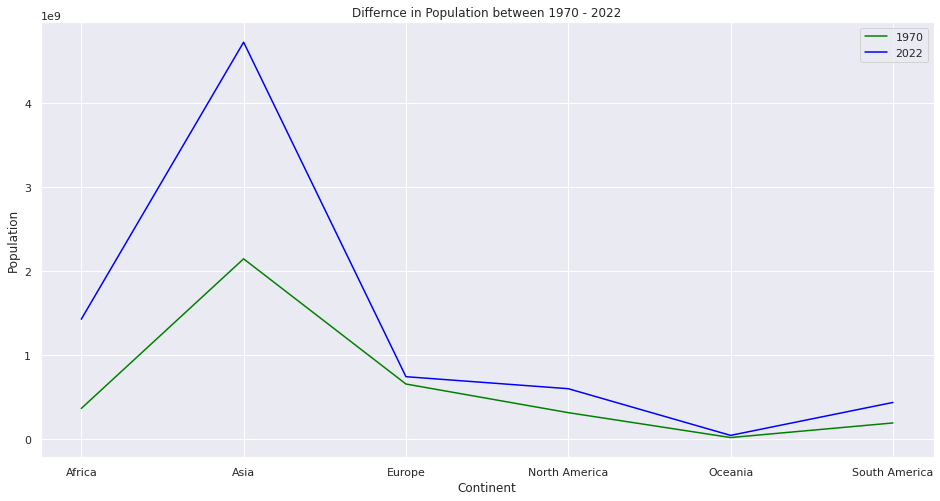

In [16]:
plt.figure(figsize = (16,8))
plt.plot(ppl_diff_70to22['Continent'],ppl_diff_70to22['1970 Population'], label = '1970', color = 'Green')
plt.plot(ppl_diff_70to22['Continent'],ppl_diff_70to22['2022 Population'], label = '2022', color = 'blue')
plt.title('Differnce in Population between 1970 - 2022')
plt.xlabel('Continent')
plt.ylabel('Population')
plt.legend()
plt.show()

***As we can see that the population has sprung up from 1970 to 2022***

In [18]:
Population_change = df.groupby('Continent')[['1970 Population', '2022 Population']].sum().sort_values(by='Continent').reset_index()
Population_change

,Continent,1970 Population,2022 Population
0,Africa,365444348,1426730932
1,Asia,2144906290,4721383274
2,Europe,655923991,743147538
3,North America,315434606,600296136
4,Oceania,19480270,45038554
5,South America,192947156,436816608


In [19]:
Population_change['Change In Population'] =(Population_change['2022 Population']-Population_change['1970 Population'])
Population_change

,Continent,1970 Population,2022 Population,Change In Population
0,Africa,365444348,1426730932,1061286584
1,Asia,2144906290,4721383274,2576476984
2,Europe,655923991,743147538,87223547
3,North America,315434606,600296136,284861530
4,Oceania,19480270,45038554,25558284
5,South America,192947156,436816608,243869452


In [20]:
Population_change['Growth Rate'] = Population_change['Change In Population']/ (2022-1970)
Population_change

,Continent,1970 Population,2022 Population,Change In Population,Growth Rate
0,Africa,365444348,1426730932,1061286584,2.040936e+07
1,Asia,2144906290,4721383274,2576476984,4.954763e+07
2,Europe,655923991,743147538,87223547,1.677376e+06
3,North America,315434606,600296136,284861530,5.478106e+06
4,Oceania,19480270,45038554,25558284,4.915055e+05
5,South America,192947156,436816608,243869452,4.689797e+06


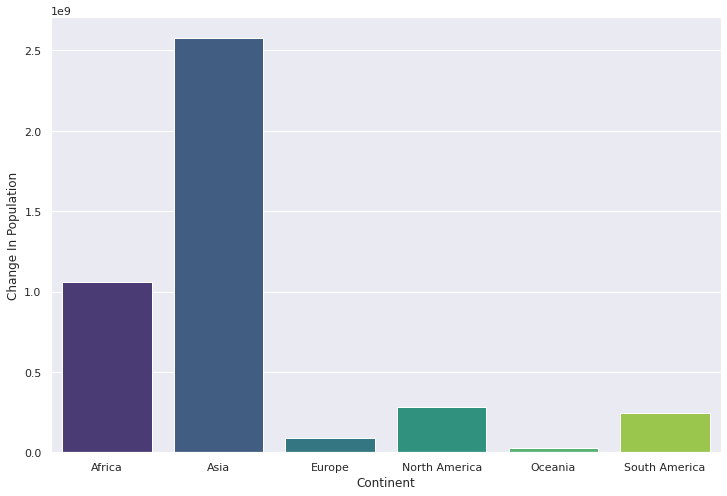

In [21]:
plt.figure(figsize = (12,8))
sns.barplot(y='Change In Population',x='Continent',data=Population_change,palette='viridis')